# 1 初识PyTorch
## 1.1 张量

1.导入pytorch包

In [1]:
import torch

2.创建一个空的5x3张量

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[9.9184e-39, 8.7245e-39, 9.2755e-39],
        [8.9082e-39, 9.9184e-39, 8.4490e-39],
        [9.6429e-39, 1.0653e-38, 1.0469e-38],
        [4.2246e-39, 1.0378e-38, 9.6429e-39],
        [9.2755e-39, 9.7346e-39, 1.0745e-38]])


3.创建一个随机初始化的5x3张量

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6802, 0.7343, 0.0883],
        [0.9648, 0.9459, 0.4975],
        [0.4727, 0.0426, 0.5312],
        [0.0116, 0.1610, 0.5037],
        [0.3714, 0.5497, 0.1693]])


4.创建一个5x3的0张量，类型为long

In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


5.直接从数组创建张量

In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


6.创建一个5x3的单位张量，类型为double

In [6]:
x = torch.ones(5, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


7.从已有的张量创建相同维度的新张量，并且重新定义类型为float

In [7]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-1.9901, -1.0415, -0.2262],
        [ 0.4157, -1.1684,  0.9232],
        [ 1.3209,  0.4706,  0.7417],
        [ 0.9764, -0.3370,  0.4088],
        [ 0.9830,  1.0176, -0.6509]])


8.打印一个张量的维度

In [8]:
print(x.size())

torch.Size([5, 3])


9.将两个张量相加

In [10]:
y = torch.rand(5, 3)
print(x + y)

#方法二
print(torch.add(x, y))

#方法三
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

#方法四
y.add_(x)
print(y)

tensor([[-1.6631, -0.0692,  0.5577],
        [ 0.5017, -0.8590,  1.4422],
        [ 1.3889,  0.8899,  1.5815],
        [ 1.6390,  0.6091,  1.1522],
        [ 1.2901,  1.8282, -0.1927]])
tensor([[-1.6631, -0.0692,  0.5577],
        [ 0.5017, -0.8590,  1.4422],
        [ 1.3889,  0.8899,  1.5815],
        [ 1.6390,  0.6091,  1.1522],
        [ 1.2901,  1.8282, -0.1927]])
tensor([[-1.6631, -0.0692,  0.5577],
        [ 0.5017, -0.8590,  1.4422],
        [ 1.3889,  0.8899,  1.5815],
        [ 1.6390,  0.6091,  1.1522],
        [ 1.2901,  1.8282, -0.1927]])
tensor([[-1.6631, -0.0692,  0.5577],
        [ 0.5017, -0.8590,  1.4422],
        [ 1.3889,  0.8899,  1.5815],
        [ 1.6390,  0.6091,  1.1522],
        [ 1.2901,  1.8282, -0.1927]])


10.取张量的第一列

In [11]:
print(x[:, 1])

tensor([-1.0415, -1.1684,  0.4706, -0.3370,  1.0176])


11.将一个4x4的张量resize成一个一维张量

In [12]:
x = torch.randn(4, 4)
y = x.view(16)
print(x.size(),y.size())

torch.Size([4, 4]) torch.Size([16])


12.将一个4x4的张量，resize成一个2x8的张量

In [13]:
y = x.view(2, 8)
print(x.size(),y.size())

# 方法二
z = x.view(-1, 8) # 确定一个维度，-1的维度会被自动计算
print(x.size(),z.size())

torch.Size([4, 4]) torch.Size([2, 8])
torch.Size([4, 4]) torch.Size([2, 8])


13.从张量中取出数字

In [14]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.2770])
-1.2770183086395264


## 1.2 Numpy的操作

14.将张量装换成numpy数组

In [15]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


15.将张量+1，并观察上题中numpy数组的变化

In [16]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


16.从numpy数组创建张量

In [17]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


17.将numpy数组+1并观察上题中张量的变化

In [18]:
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# 2 自动微分
## 2.1 张量的自动微分

18.新建一个张量，并设置requires_grad=True

In [19]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


19.对张量进行任意操作（y = x + 2）

In [20]:
y = x + 2
print(y)
print(y.grad_fn) # y就多了一个AddBackward

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


20.再对y进行任意操作

In [21]:
z = y * y * 3
out = z.mean()

print(z) # z多了MulBackward
print(out) # out多了MeanBackward

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


## 2.2 梯度

21.对out进行反向传播

In [22]:
out.backward()

22.打印梯度d(out)/dx

In [23]:
print(x.grad) #out=0.25*Σ3(x+2)^2

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


23.创建一个结果为矢量的计算过程（y=x*2^n）

In [24]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-842.5035, -939.8803,  969.3865], grad_fn=<MulBackward0>)


24.计算v = [0.1, 1.0, 0.0001]处的梯度

In [25]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


25.关闭梯度的功能

In [26]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)
    
# 方法二
# print(x.requires_grad)
# y = x.detach()
# print(y.requires_grad)
# print(x.eq(y).all())

True
True
False


# 3 神经网络
这部分会实现LeNet5
## 3.1 定义网络

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 26.定义①的卷积层，输入为32x32的图像，卷积核大小5x5卷积核种类6
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 27.定义③的卷积层，输入为前一层6个特征，卷积核大小5x5，卷积核种类16
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 28.定义⑤的全链接层，输入为16*5*5，输出为120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 6*6 from image dimension
        # 29.定义⑥的全连接层，输入为120，输出为84
        self.fc2 = nn.Linear(120, 84)
        # 30.定义⑥的全连接层，输入为84，输出为10
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 31.完成input-S2，先卷积+relu，再2x2下采样
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 32.完成S2-S4，先卷积+relu，再2x2下采样
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) #卷积核方形时，可以只写一个维度
        # 33.将特征向量扁平成行向量
        x = x.view(-1, 16 * 5 * 5)
        # 34.使用fc1+relu
        x = F.relu(self.fc1(x))
        # 35.使用fc2+relu
        x = F.relu(self.fc2(x))
        # 36.使用fc3
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


37.打印网络的参数

In [32]:
params = list(net.parameters())
# print(params)
print(len(params))

10


38.打印某一层参数的形状

In [38]:
print(params[0].size())

torch.Size([6, 3, 5, 5])


39.随机输入一个向量，查看前向传播输出

In [40]:
input = torch.randn(1,3, 32, 32) #第二个参数3：3通道
out = net(input)
print(out)

tensor([[-0.0155, -0.0501, -0.0823,  0.1400, -0.1036, -0.0903, -0.0767,  0.1303,
          0.0956, -0.0410]], grad_fn=<AddmmBackward>)


40.将梯度清零

In [41]:
net.zero_grad()

41.随机一个梯度进行反向传播

In [42]:
out.backward(torch.randn(1, 10))

## 3.2 损失函数

42.用自带的MSELoss()定义损失函数

In [43]:
criterion = nn.MSELoss()

43.随机一个真值，并用随机的输入计算损失

In [44]:
target = torch.randn(10)  # 随机真值
target = target.view(1, -1)  # 变成行向量

output = net(input)  # 用随机输入计算输出

loss = criterion(output, target)  # 计算损失
print(loss)

tensor(1.4700, grad_fn=<MseLossBackward>)


44.将梯度初始化，计算上一步中loss的反向传播

In [45]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])


45.计算43中loss的反向传播

In [46]:
loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([-0.0190,  0.0016, -0.0035,  0.0072, -0.0034,  0.0057])


## 3.3 更新权重

46.定义SGD优化器算法，学习率设置为0.01

In [47]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

47.使用优化器更新权重

In [48]:
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()

# 更新权重
optimizer.step()

# 4 训练一个分类器
## 4.1 读取CIFAR10数据，做标准化

48.构造一个transform，将三通道(0,1)区间的数据转换成(-1,1)的数据

In [49]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

读取数据集，挑几个看看啥样

In [52]:
from torch.utils.data import Dataset, DataLoader
import os
import pickle

batch_size = 4

def load_cifar_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
        Y = np.array(Y)
        return list(zip(X, Y))
def load_cifar(ROOT):
    dataset = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        batch = load_cifar_batch(f)
        dataset.append(batch)
    data_train = np.concatenate(dataset)
    del batch
    data_test = load_cifar_batch(os.path.join(ROOT, 'test_batch'))
    return data_train, data_test
    
class cifar(Dataset):
    def __init__(self, root, segmentation='train', transforms=None):
        if segmentation == 'train':
            self.data = load_cifar(root)[0]
        elif segmentation == 'test':
            self.data = load_cifar(root)[1]
        self.transform = transform
    def __getitem__(self, index):
        data = self.data[index][0]
        if(self.transform):
            data = (self.transform(data))
        else:
            data = (torch.from_numpy(data))
        label = self.data[index][1]
        return data, label
    def __len__(self):
        return len(self.data)

In [60]:
trainset = cifar(root = './cifar', segmentation='train', transforms=transform)
testset = cifar(root = './cifar', segmentation='test', transforms=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=0) 

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


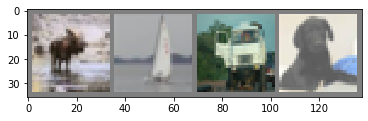

 deer  ship truck   dog


In [61]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # 把数据退回(0,1)区间
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机取一些数据
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 展示图片
imshow(torchvision.utils.make_grid(images))
# 展示分类
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 4.2 建立网络

In [62]:
#沿用前面的网络
net2 = Net()

## 4.3 定义损失函数和优化器

49.定义交叉熵损失函数

In [63]:
criterion2 = nn.CrossEntropyLoss()

50.定义SGD优化器算法，学习率设置为0.001，momentum=0.9

In [64]:
optimizer2 = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

## 4.4训练网络

In [68]:
for epoch in range(2): 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取X,y对
        inputs, labels = data
        labels = labels.to(dtype=torch.int64)

        # 51.初始化梯度
        optimizer2.zero_grad()

        # 52.前馈
        outputs = net2(inputs)
        # 53.计算损失
        loss = criterion2(outputs, labels)
        # 54.计算梯度
        loss.backward()
        # 55.更新权值
        optimizer2.step()

        # 每2000个数据打印平均代价函数值
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.176
[1,  4000] loss: 1.817
[1,  6000] loss: 1.648
[1,  8000] loss: 1.570
[1, 10000] loss: 1.499
[1, 12000] loss: 1.468
[2,  2000] loss: 1.380
[2,  4000] loss: 1.378
[2,  6000] loss: 1.355
[2,  8000] loss: 1.323
[2, 10000] loss: 1.302
[2, 12000] loss: 1.267
Finished Training


## 4.5 使用模型预测

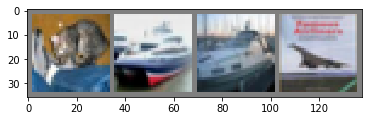

GroundTruth:    cat  ship  ship plane


In [69]:
#先取一些数据
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

56.使用模型预测

In [70]:
outputs = net2(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  ship  ship  ship


57.在测试集上进行打分

In [71]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


## 4.6 存取模型

58.保存训练好的模型

In [72]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

59.读取保存的模型

In [73]:
pretrained_net = torch.load(PATH)

60.加载模型

In [74]:
net3 = Net()

net3.load_state_dict(pretrained_net)

<All keys matched successfully>